In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

# Cybersecurity Regression Datasets

This repository provides two synthetic datasets designed for regression modeling tasks in the cybersecurity domain. Each dataset includes **1,000 samples** with clearly defined data-generating processes and added Gaussian noise.

---

### Dataset B: Three Features

**File:** `cyber_risk_3features.csv`

- **Features:**
  - `failed_login_attempts` (integer): Same distribution as in Dataset A (Poisson λ = 2, truncated at [0, 20]).  
  - `password_age_days` (float): Days since the last password change, sampled from a Uniform(0, 365).  
  - `phishing_click_rate` (float): Simulated proportion of phishing links clicked, drawn from a Beta(2, 8) distribution.

- **Target (risk_score):**  
  Defined by the following regression model with an interaction term:

  \[
  \text{risk\_score} = 10 + 2.5x_1 + 0.02x_2 + 20x_3 + 0.5(x_1 \cdot x_3) + \varepsilon,
  \quad \varepsilon \sim \mathcal{N}(0, 3^2)
  \]

  where \(x_1 =\) failed login attempts, \(x_2 =\) password age in days, and \(x_3 =\) phishing click rate.  
  Values are clipped to [0, 100].

---


In [3]:
path = "./data/cyber_risk_3features.csv"
num_df = pd.read_csv(path)

feature_cols = ["failed_login_attempts", "password_age_days", "phishing_click_rate"]
target_col = "risk_score"

X = num_df[feature_cols].values
y = num_df[target_col].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [4]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

In [5]:
pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)

X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

In [20]:
X_train

array([[0.00000000e+00, 6.47267871e+01, 3.66857353e-01],
       [1.00000000e+00, 3.37788837e+02, 4.10068950e-01],
       [2.00000000e+00, 2.69101550e+02, 5.88411023e-01],
       ...,
       [2.00000000e+00, 8.72495059e+01, 3.02745913e-01],
       [2.00000000e+00, 6.72358157e+01, 1.27408519e-01],
       [2.00000000e+00, 8.35608276e+01, 4.04848840e-01]], shape=(700, 3))

In [19]:
X_train_transformed

array([[-1.15778330e+02, -1.80862577e+00],
       [ 1.57284071e+02, -9.09978142e-01],
       [ 8.85971563e+01,  1.16694679e-01],
       ...,
       [-9.32548667e+01,  1.82545061e-01],
       [-1.13268550e+02,  1.88876864e-01],
       [-9.69435476e+01,  1.84567108e-01]], shape=(700, 2))

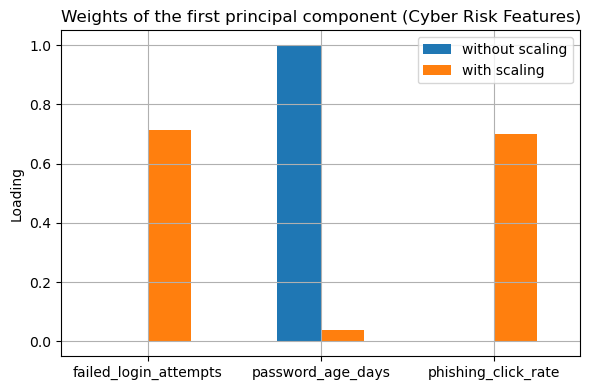

In [6]:
first_pca_component = pd.DataFrame(
    pca.components_[0], index=feature_cols, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]

ax = first_pca_component.plot.bar(
    title="Weights of the first principal component (Cyber Risk Features)",
    rot=0
)
ax.set_ylabel("Loading")
_ = plt.tight_layout()
plt.show()

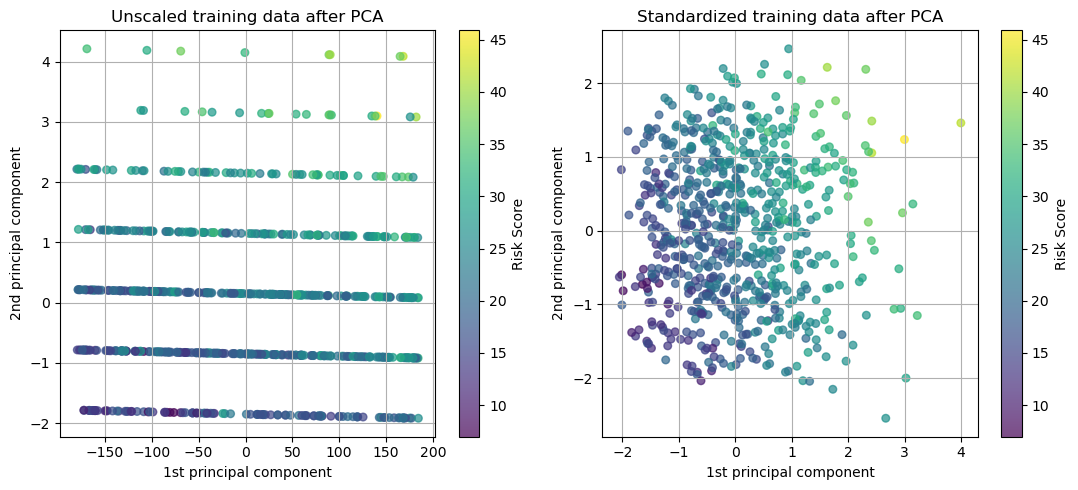

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))

sc1 = ax1.scatter(
    X_train_transformed[:, 0], X_train_transformed[:, 1],
    c=y_train, cmap="viridis", alpha=0.7, s=30
)
cb1 = plt.colorbar(sc1, ax=ax1)
cb1.set_label("Risk Score")
ax1.set_title("Unscaled training data after PCA")
ax1.set_xlabel("1st principal component")
ax1.set_ylabel("2nd principal component")
ax1.grid(True)

sc2 = ax2.scatter(
    X_train_std_transformed[:, 0], X_train_std_transformed[:, 1],
    c=y_train, cmap="viridis", alpha=0.7, s=30
)
cb2 = plt.colorbar(sc2, ax=ax2)
cb2.set_label("Risk Score")
ax2.set_title("Standardized training data after PCA")
ax2.set_xlabel("1st principal component")
ax2.set_ylabel("2nd principal component")
ax2.grid(True)

_ = plt.tight_layout()
plt.show()

In [ ]:
#  pca.explained_variance_ratio_)가 뭐뭔지

In [8]:
print("Explained variance ratio (unscaled):", pca.explained_variance_ratio_)
print("Cumulative (unscaled):", np.cumsum(pca.explained_variance_ratio_))
print("Explained variance ratio (scaled):", scaled_pca.explained_variance_ratio_)
print("Cumulative (scaled):", np.cumsum(scaled_pca.explained_variance_ratio_))

Explained variance ratio (unscaled): [9.99838168e-01 1.60610309e-04]
Cumulative (unscaled): [0.99983817 0.99999878]
Explained variance ratio (scaled): [0.3571513  0.33907298]
Cumulative (scaled): [0.3571513  0.69622428]


## Synthetic Data

In [ ]:
# 참고띠?

Correlation matrix:
                        password_age_days  failed_login_attempts
password_age_days               1.000000               0.701302
failed_login_attempts           0.701302               1.000000

Explained variance ratio (unscaled): [9.99999047e-01 9.53080452e-07]
Explained variance ratio (scaled):   [0.85065082 0.14934918]

Principal component loadings:
                        PC1 (unscaled)  PC1 (scaled)  PC2 (unscaled)  \
password_age_days             1.00000      0.707107        -0.00096   
failed_login_attempts         0.00096      0.707107         1.00000   

                       PC2 (scaled)  
password_age_days          0.707107  
failed_login_attempts     -0.707107  


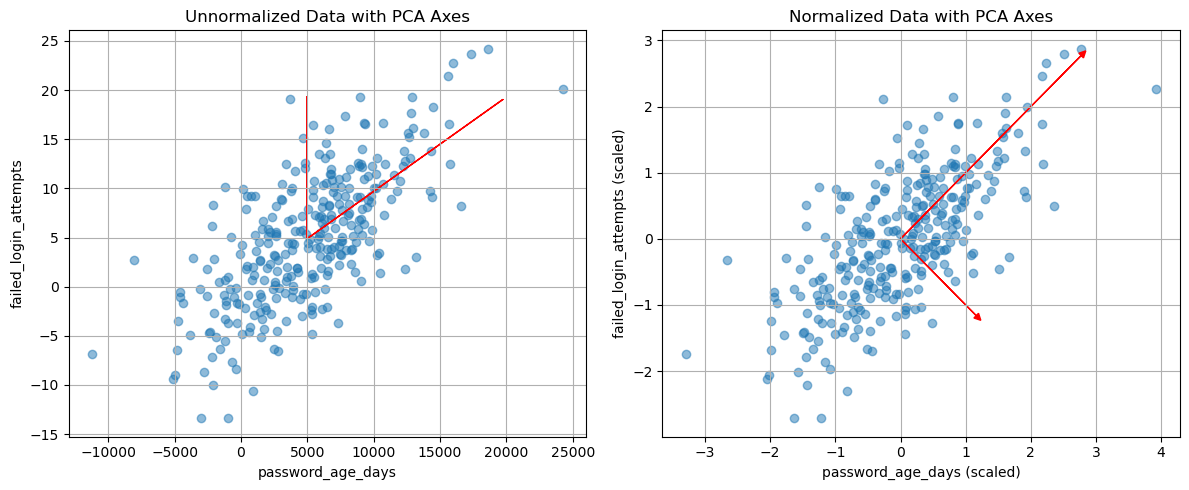

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

# 1) 양(+)의 상관관계를 갖도록 데이터 설계
n = 300
password_age_days = np.random.normal(loc=5000, scale=5000, size=n)               # 큰 스케일
noise = np.random.normal(loc=0.0, scale=5.0, size=n)                             # 작은 잡음
failed_login_attempts = 0.001 * password_age_days + noise                         # 양의 상관 유도

X = np.column_stack([password_age_days, failed_login_attempts])
cols = ["password_age_days", "failed_login_attempts"]
df = pd.DataFrame(X, columns=cols)

# 상관 확인
print("Correlation matrix:\n", df.corr())

# 2) PCA: 정규화 전/후
pca_raw = PCA(n_components=2).fit(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_scaled = PCA(n_components=2).fit(X_scaled)

print("\nExplained variance ratio (unscaled):", pca_raw.explained_variance_ratio_)
print("Explained variance ratio (scaled):  ", pca_scaled.explained_variance_ratio_)

# 3) 주성분 로딩(가중치) 비교
loadings = pd.DataFrame(
    {
        "PC1 (unscaled)": pca_raw.components_[0],
        "PC1 (scaled)":   pca_scaled.components_[0],
        "PC2 (unscaled)": pca_raw.components_[1],
        "PC2 (scaled)":   pca_scaled.components_[1],
    },
    index=cols
)
print("\nPrincipal component loadings:\n", loadings)

# 4) 시각화: 산점도 + PCA 주축(화살표)
def draw_pca_axes(ax, mean_vec, components, variances, scale_arrow=3.0, color='red',
                  head_width=0.1, head_length=0.1):
    # length ∝ sqrt(variance), 방향 = components[i]
    for lam, vec in zip(variances, components):
        v = vec * scale_arrow * np.sqrt(lam)
        ax.arrow(mean_vec[0], mean_vec[1], v[0], v[1],
                 head_width=head_width, head_length=head_length, color=color)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# (a) 정규화 전
ax1.scatter(X[:, 0], X[:, 1], alpha=0.5)
ax1.set_title("Unnormalized Data with PCA Axes")
ax1.set_xlabel("password_age_days")
ax1.set_ylabel("failed_login_attempts")
# 주축: 평균 위치에서 시작하는 화살표
draw_pca_axes(ax1, pca_raw.mean_, pca_raw.components_, pca_raw.explained_variance_,
              scale_arrow=3.0, color='red', head_width=0.1, head_length=0.1)

# (b) 정규화 후
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
ax2.set_title("Normalized Data with PCA Axes")
ax2.set_xlabel("password_age_days (scaled)")
ax2.set_ylabel("failed_login_attempts (scaled)")
draw_pca_axes(ax2, pca_scaled.mean_, pca_scaled.components_, pca_scaled.explained_variance_,
              scale_arrow=3.0, color='red', head_width=0.1, head_length=0.1)

plt.tight_layout()
plt.show()
